<a href="https://colab.research.google.com/github/HSKrab/Share-Cycle/blob/main/Share_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://signate.jp/competitions/567

https://blog.francium.tech/time-series-prediction-with-tensorflow-and-keras-c9510dda109d

https://helve-blog.com/posts/python/keras-recurrent-neural-network/

https://medium.datadriveninvestor.com/multivariate-time-series-using-gated-recurrent-unit-gru-1039099e545a

In [ ]:
!pip install japanize_matplotlib
import pandas as pd
import time
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import japanize_matplotlib
from google.colab import files,drive
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import r2_score
import scipy.optimize
import scipy.stats
#uploaded = files.upload()
drive.mount('/content/drive')
%cd /content/drive/My Drive/Data/Share Cycle
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Data/Share Cycle


## import data

In [ ]:
sample_submit = pd.read_csv('sample_submit.csv')
sample_submit

,8761,1.111
0,8762,1.111
1,8763,1.111
2,8764,1.111
3,8765,1.111
4,8766,1.111
...,...,...
193194,1226347,1.111
193195,1226348,1.111
193196,1226349,1.111
193197,1226350,1.111


In [ ]:
station = pd.read_csv('station.csv')
station

,station_id,lat,long,dock_count,city,installation_date
0,0,37.32973,-121.90178,27,city1,8/6/2013
1,1,37.33070,-121.88898,15,city1,8/5/2013
2,2,37.33399,-121.89490,11,city1,8/6/2013
3,3,37.33141,-121.89320,19,city1,8/5/2013
4,4,37.33672,-121.89407,15,city1,8/7/2013
...,...,...,...,...,...,...
65,65,37.78963,-122.40081,27,city2,8/25/2013
66,66,37.35260,-121.90573,15,city1,12/31/2013
67,67,37.79854,-122.40086,15,city2,1/22/2014
68,68,37.49127,-122.23623,15,city3,2/20/2014


In [ ]:
status = pd.read_csv('status.csv')
status

,id,year,month,day,hour,station_id,bikes_available,predict
0,0,2013,9,1,0,0,11.0,0
1,1,2013,9,1,1,0,11.0,0
2,2,2013,9,1,2,0,11.0,0
3,3,2013,9,1,3,0,11.0,0
4,4,2013,9,1,4,0,11.0,0
...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0
1226396,1226396,2015,8,31,20,69,8.0,0
1226397,1226397,2015,8,31,21,69,8.0,0
1226398,1226398,2015,8,31,22,69,8.0,0


In [ ]:
trip = pd.read_csv('trip.csv')
trip

,trip_id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type
0,0,63,8/29/2013 14:13,54,8/29/2013 14:14,54,0,Subscriber
1,1,70,8/29/2013 14:42,8,8/29/2013 14:43,8,1,Subscriber
2,2,71,8/29/2013 10:16,20,8/29/2013 10:17,20,2,Subscriber
3,3,77,8/29/2013 11:29,8,8/29/2013 11:30,8,3,Subscriber
4,4,83,8/29/2013 12:02,54,8/29/2013 12:04,55,4,Subscriber
...,...,...,...,...,...,...,...,...
669954,669954,619,9/1/2014 4:21,41,9/1/2014 4:32,53,593,Subscriber
669955,669955,6712,9/1/2014 3:16,39,9/1/2014 5:08,58,51,Customer
669956,669956,538,9/1/2014 0:05,54,9/1/2014 0:14,45,248,Customer
669957,669957,568,9/1/2014 0:05,54,9/1/2014 0:15,45,236,Customer


In [ ]:
weather = pd.read_csv('weather.csv')
weather

,date,max_temperature,mean_temperature,min_temperature,max_dew_point,mean_dew_point,min_dew_point,max_humidity,mean_humidity,min_humidity,...,min_sea_level_pressure,max_visibility,mean_visibility,min_visibility,max_wind_Speed,mean_wind_speed,precipitation,cloud_cover,events,wind_dir_degrees
0,2013-09-01,81,70,61,62,58,54,80,67,47,...,29.85,10,10,10,14,4,0.00,1,NaN,354
1,2013-09-02,80,71,66,64,61,58,80,70,58,...,29.86,10,10,10,14,4,0.00,5,NaN,337
2,2013-09-03,81,69,58,60,56,52,82,65,44,...,29.93,10,10,10,19,2,1.71,6,Rain,341
3,2013-09-04,82,68,56,61,55,49,81,64,43,...,29.94,10,10,10,15,0,0.00,0,NaN,324
4,2013-09-05,81,68,56,59,54,50,81,63,41,...,29.95,10,10,10,16,1,0.00,0,NaN,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2015-08-27,89,76,63,59,55,48,78,52,26,...,29.97,10,10,10,22,5,0.00,0,NaN,356
726,2015-08-28,91,78,64,65,60,53,87,61,34,...,29.84,10,10,10,22,7,0.00,1,NaN,356
727,2015-08-29,81,73,64,65,62,52,87,68,49,...,29.92,10,10,10,23,7,0.00,4,NaN,349
728,2015-08-30,79,70,61,60,55,51,78,63,47,...,29.96,10,10,10,22,8,0.00,2,NaN,327


##Preprocess

In [ ]:
station['installation_date'] = station['installation_date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))
station

,station_id,lat,long,dock_count,city,installation_date
0,0,37.32973,-121.90178,27,city1,2013-08-06
1,1,37.33070,-121.88898,15,city1,2013-08-05
2,2,37.33399,-121.89490,11,city1,2013-08-06
3,3,37.33141,-121.89320,19,city1,2013-08-05
4,4,37.33672,-121.89407,15,city1,2013-08-07
...,...,...,...,...,...,...
65,65,37.78963,-122.40081,27,city2,2013-08-25
66,66,37.35260,-121.90573,15,city1,2013-12-31
67,67,37.79854,-122.40086,15,city2,2014-01-22
68,68,37.49127,-122.23623,15,city3,2014-02-20


In [ ]:
status['date_time'] = pd.to_datetime(status[['year', 'month', 'day', 'hour']])
status

,id,year,month,day,hour,station_id,bikes_available,predict,date_time
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00
...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31 19:00:00
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31 20:00:00
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31 21:00:00
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31 22:00:00


In [ ]:
status['date'] = status['date_time'].dt.date.apply(lambda x: x.strftime('%Y-%m-%d'))
status

,id,year,month,day,hour,station_id,bikes_available,predict,date_time,date
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00,2013-09-01
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00,2013-09-01
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00,2013-09-01
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00,2013-09-01
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00,2013-09-01
...,...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31 19:00:00,2015-08-31
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31 20:00:00,2015-08-31
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31 21:00:00,2015-08-31
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31 22:00:00,2015-08-31


In [ ]:
status['weekday'] = status['date_time'].dt.weekday
status

,id,year,month,day,hour,station_id,bikes_available,predict,date_time,date,weekday
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00,2013-09-01,6
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00,2013-09-01,6
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00,2013-09-01,6
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00,2013-09-01,6
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00,2013-09-01,6
...,...,...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31 19:00:00,2015-08-31,0
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31 20:00:00,2015-08-31,0
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31 21:00:00,2015-08-31,0
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31 22:00:00,2015-08-31,0


'weekday' = 5(Saturday) or 6(Sunday), 'weekend' = 1.

In [ ]:
status['weekend'] = status['weekday'].apply(lambda x: 1 if x>4 else 0)
status

,id,year,month,day,hour,station_id,bikes_available,predict,date_time,date,weekday,weekend
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00,2013-09-01,6,1
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00,2013-09-01,6,1
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00,2013-09-01,6,1
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00,2013-09-01,6,1
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00,2013-09-01,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31 19:00:00,2015-08-31,0,0
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31 20:00:00,2015-08-31,0,0
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31 21:00:00,2015-08-31,0,0
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31 22:00:00,2015-08-31,0,0


In [ ]:
status = status.merge(station[['station_id', 'dock_count']], on='station_id')
status

,id,year,month,day,hour,station_id,bikes_available,predict,date_time,date,weekday,weekend,dock_count
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00,2013-09-01,6,1,27
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00,2013-09-01,6,1,27
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00,2013-09-01,6,1,27
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00,2013-09-01,6,1,27
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00,2013-09-01,6,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31 19:00:00,2015-08-31,0,0,15
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31 20:00:00,2015-08-31,0,0,15
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31 21:00:00,2015-08-31,0,0,15
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31 22:00:00,2015-08-31,0,0,15


In [ ]:
status['available_rate'] = status['bikes_available']/status['dock_count']
status

,id,year,month,day,hour,station_id,bikes_available,predict,date_time,date,weekday,weekend,dock_count,available_rate
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00,2013-09-01,6,1,27,0.407407
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00,2013-09-01,6,1,27,0.407407
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00,2013-09-01,6,1,27,0.407407
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00,2013-09-01,6,1,27,0.407407
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00,2013-09-01,6,1,27,0.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31 19:00:00,2015-08-31,0,0,15,0.533333
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31 20:00:00,2015-08-31,0,0,15,0.533333
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31 21:00:00,2015-08-31,0,0,15,0.533333
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31 22:00:00,2015-08-31,0,0,15,0.533333


In [ ]:
trip

,trip_id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type
0,0,63,8/29/2013 14:13,54,8/29/2013 14:14,54,0,Subscriber
1,1,70,8/29/2013 14:42,8,8/29/2013 14:43,8,1,Subscriber
2,2,71,8/29/2013 10:16,20,8/29/2013 10:17,20,2,Subscriber
3,3,77,8/29/2013 11:29,8,8/29/2013 11:30,8,3,Subscriber
4,4,83,8/29/2013 12:02,54,8/29/2013 12:04,55,4,Subscriber
...,...,...,...,...,...,...,...,...
669954,669954,619,9/1/2014 4:21,41,9/1/2014 4:32,53,593,Subscriber
669955,669955,6712,9/1/2014 3:16,39,9/1/2014 5:08,58,51,Customer
669956,669956,538,9/1/2014 0:05,54,9/1/2014 0:14,45,248,Customer
669957,669957,568,9/1/2014 0:05,54,9/1/2014 0:15,45,236,Customer


Subscriber = 1; Customer = 0.

In [ ]:
trip['subscription_type'] = trip['subscription_type'].apply(lambda x: 1 if x == 'Subscriber' else 0)
trip

,trip_id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type
0,0,63,8/29/2013 14:13,54,8/29/2013 14:14,54,0,1
1,1,70,8/29/2013 14:42,8,8/29/2013 14:43,8,1,1
2,2,71,8/29/2013 10:16,20,8/29/2013 10:17,20,2,1
3,3,77,8/29/2013 11:29,8,8/29/2013 11:30,8,3,1
4,4,83,8/29/2013 12:02,54,8/29/2013 12:04,55,4,1
...,...,...,...,...,...,...,...,...
669954,669954,619,9/1/2014 4:21,41,9/1/2014 4:32,53,593,1
669955,669955,6712,9/1/2014 3:16,39,9/1/2014 5:08,58,51,0
669956,669956,538,9/1/2014 0:05,54,9/1/2014 0:14,45,248,0
669957,669957,568,9/1/2014 0:05,54,9/1/2014 0:15,45,236,0


In [ ]:
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['end_date'] = pd.to_datetime(trip['end_date'])
trip

,trip_id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type
0,0,63,2013-08-29 14:13:00,54,2013-08-29 14:14:00,54,0,1
1,1,70,2013-08-29 14:42:00,8,2013-08-29 14:43:00,8,1,1
2,2,71,2013-08-29 10:16:00,20,2013-08-29 10:17:00,20,2,1
3,3,77,2013-08-29 11:29:00,8,2013-08-29 11:30:00,8,3,1
4,4,83,2013-08-29 12:02:00,54,2013-08-29 12:04:00,55,4,1
...,...,...,...,...,...,...,...,...
669954,669954,619,2014-09-01 04:21:00,41,2014-09-01 04:32:00,53,593,1
669955,669955,6712,2014-09-01 03:16:00,39,2014-09-01 05:08:00,58,51,0
669956,669956,538,2014-09-01 00:05:00,54,2014-09-01 00:14:00,45,248,0
669957,669957,568,2014-09-01 00:05:00,54,2014-09-01 00:15:00,45,236,0


In [ ]:
weather

,date,max_temperature,mean_temperature,min_temperature,max_dew_point,mean_dew_point,min_dew_point,max_humidity,mean_humidity,min_humidity,...,min_sea_level_pressure,max_visibility,mean_visibility,min_visibility,max_wind_Speed,mean_wind_speed,precipitation,cloud_cover,events,wind_dir_degrees
0,2013-09-01,81,70,61,62,58,54,80,67,47,...,29.85,10,10,10,14,4,0.00,1,NaN,354
1,2013-09-02,80,71,66,64,61,58,80,70,58,...,29.86,10,10,10,14,4,0.00,5,NaN,337
2,2013-09-03,81,69,58,60,56,52,82,65,44,...,29.93,10,10,10,19,2,1.71,6,Rain,341
3,2013-09-04,82,68,56,61,55,49,81,64,43,...,29.94,10,10,10,15,0,0.00,0,NaN,324
4,2013-09-05,81,68,56,59,54,50,81,63,41,...,29.95,10,10,10,16,1,0.00,0,NaN,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2015-08-27,89,76,63,59,55,48,78,52,26,...,29.97,10,10,10,22,5,0.00,0,NaN,356
726,2015-08-28,91,78,64,65,60,53,87,61,34,...,29.84,10,10,10,22,7,0.00,1,NaN,356
727,2015-08-29,81,73,64,65,62,52,87,68,49,...,29.92,10,10,10,23,7,0.00,4,NaN,349
728,2015-08-30,79,70,61,60,55,51,78,63,47,...,29.96,10,10,10,22,8,0.00,2,NaN,327


## EDA

####Station

In [ ]:
station

,station_id,lat,long,dock_count,city,installation_date
0,0,37.32973,-121.90178,27,city1,2013-08-06
1,1,37.33070,-121.88898,15,city1,2013-08-05
2,2,37.33399,-121.89490,11,city1,2013-08-06
3,3,37.33141,-121.89320,19,city1,2013-08-05
4,4,37.33672,-121.89407,15,city1,2013-08-07
...,...,...,...,...,...,...
65,65,37.78963,-122.40081,27,city2,2013-08-25
66,66,37.35260,-121.90573,15,city1,2013-12-31
67,67,37.79854,-122.40086,15,city2,2014-01-22
68,68,37.49127,-122.23623,15,city3,2014-02-20


In [ ]:
station['city'].value_counts()

city2    35
city1    16
city3     7
city4     7
city5     5
Name: city, dtype: int64

In [ ]:
station.groupby(by = 'city')['dock_count'].mean()

city
city1    16.500000
city2    19.000000
city3    16.428571
city4    16.714286
city5    15.000000
Name: dock_count, dtype: float64

city2 has the most stations and average dock_count

Refer to the tutorial.

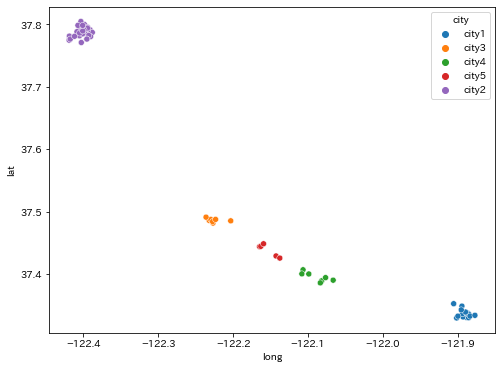

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='long', y='lat', hue='city', data=station) 
plt.show()

####Status

In [ ]:
status[status['station_id'] == 0]

,id,year,month,day,hour,station_id,bikes_available,predict,date_time,date,weekday,weekend,dock_count,available_rate
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00,2013-09-01,6,1,27,0.407407
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00,2013-09-01,6,1,27,0.407407
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00,2013-09-01,6,1,27,0.407407
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00,2013-09-01,6,1,27,0.407407
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00,2013-09-01,6,1,27,0.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17515,2015,8,31,19,0,17.0,0,2015-08-31 19:00:00,2015-08-31,0,0,27,0.629630
17516,17516,2015,8,31,20,0,18.0,0,2015-08-31 20:00:00,2015-08-31,0,0,27,0.666667
17517,17517,2015,8,31,21,0,18.0,0,2015-08-31 21:00:00,2015-08-31,0,0,27,0.666667
17518,17518,2015,8,31,22,0,18.0,0,2015-08-31 22:00:00,2015-08-31,0,0,27,0.666667


2014年9月～2015年8月までの1年分の期間で各月から10日ずつ選ばれた予測対象日の「1時～23時（1時間ごと）」の自転車台数です。</br>
23×10×12 = 2,760

In [ ]:
status[(status['predict'] == 1) & (status['station_id'] == 0)]

,id,year,month,day,hour,station_id,bikes_available,predict,date_time,date,weekday,weekend,dock_count,available_rate
8761,8761,2014,9,1,1,0,NaN,1,2014-09-01 01:00:00,2014-09-01,0,0,27,NaN
8762,8762,2014,9,1,2,0,NaN,1,2014-09-01 02:00:00,2014-09-01,0,0,27,NaN
8763,8763,2014,9,1,3,0,NaN,1,2014-09-01 03:00:00,2014-09-01,0,0,27,NaN
8764,8764,2014,9,1,4,0,NaN,1,2014-09-01 04:00:00,2014-09-01,0,0,27,NaN
8765,8765,2014,9,1,5,0,NaN,1,2014-09-01 05:00:00,2014-09-01,0,0,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,17467,2015,8,29,19,0,NaN,1,2015-08-29 19:00:00,2015-08-29,5,1,27,NaN
17468,17468,2015,8,29,20,0,NaN,1,2015-08-29 20:00:00,2015-08-29,5,1,27,NaN
17469,17469,2015,8,29,21,0,NaN,1,2015-08-29 21:00:00,2015-08-29,5,1,27,NaN
17470,17470,2015,8,29,22,0,NaN,1,2015-08-29 22:00:00,2015-08-29,5,1,27,NaN


2,760×70 = 193,200

In [ ]:
status[(status['predict'] == 1)]

,id,year,month,day,hour,station_id,bikes_available,predict,date_time,date,weekday,weekend,dock_count,available_rate
8761,8761,2014,9,1,1,0,NaN,1,2014-09-01 01:00:00,2014-09-01,0,0,27,NaN
8762,8762,2014,9,1,2,0,NaN,1,2014-09-01 02:00:00,2014-09-01,0,0,27,NaN
8763,8763,2014,9,1,3,0,NaN,1,2014-09-01 03:00:00,2014-09-01,0,0,27,NaN
8764,8764,2014,9,1,4,0,NaN,1,2014-09-01 04:00:00,2014-09-01,0,0,27,NaN
8765,8765,2014,9,1,5,0,NaN,1,2014-09-01 05:00:00,2014-09-01,0,0,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226347,1226347,2015,8,29,19,69,NaN,1,2015-08-29 19:00:00,2015-08-29,5,1,15,NaN
1226348,1226348,2015,8,29,20,69,NaN,1,2015-08-29 20:00:00,2015-08-29,5,1,15,NaN
1226349,1226349,2015,8,29,21,69,NaN,1,2015-08-29 21:00:00,2015-08-29,5,1,15,NaN
1226350,1226350,2015,8,29,22,69,NaN,1,2015-08-29 22:00:00,2015-08-29,5,1,15,NaN


####Trip

In [ ]:
trip_time = trip[['start_date']].copy(deep=True)
trip_time['time'] = trip['start_date'].dt.time
trip_time

,start_date,time
0,2013-08-29 14:13:00,14:13:00
1,2013-08-29 14:42:00,14:42:00
2,2013-08-29 10:16:00,10:16:00
3,2013-08-29 11:29:00,11:29:00
4,2013-08-29 12:02:00,12:02:00
...,...,...
669954,2014-09-01 04:21:00,04:21:00
669955,2014-09-01 03:16:00,03:16:00
669956,2014-09-01 00:05:00,00:05:00
669957,2014-09-01 00:05:00,00:05:00


Take a look at the time of the beginning of all the trips.</br>
[Ref] https://microeducate.tech/plot-histogram-of-datetime-time-python-matplotlib/

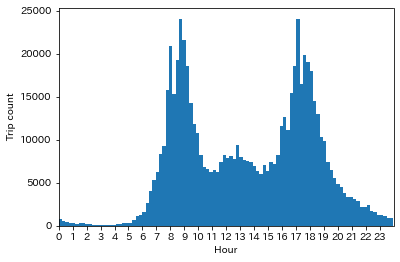

In [ ]:
def chart(occurance_list):
    hour_list = [t.hour + t.minute/60 for t in occurance_list]
    numbers=[x for x in range(0,24)]
    labels=map(lambda x: str(x), numbers)
    plt.xlabel('Hour')
    plt.xticks(numbers, labels)
    plt.xlim(0,24)
    plt.ylabel('Trip count')
    plt.hist(hour_list, bins=100)
    plt.show()
chart(trip_time['time'])

In [ ]:
#trip[['duration', 'start_station_id', 'end_station_id']].join(station[['station_id', 'dock_count', 'city']].set_index('station_id'), on=['end_station_id'])
trip_buf = trip[['duration', 'start_station_id', 'end_station_id', 'subscription_type']]
station_buf = station[['station_id', 'dock_count', 'city']].set_index('station_id')
trip_buf = trip_buf.join(station_buf, on=['start_station_id']).rename(columns = {'dock_count': 'start_dock', 'city': 'start_city'})
trip_buf = trip_buf.join(station_buf, on=['end_station_id']).rename(columns = {'dock_count': 'end_dock', 'city': 'end_city'})
trip_buf

,duration,start_station_id,end_station_id,subscription_type,start_dock,start_city,end_dock,end_city
0,63,54,54,1,19,city2,19,city2
1,70,8,8,1,15,city1,15,city1
2,71,20,20,1,15,city4,15,city4
3,77,8,8,1,15,city1,15,city1
4,83,54,55,1,19,city2,27,city2
...,...,...,...,...,...,...,...,...
669954,619,41,53,1,19,city2,15,city2
669955,6712,39,58,0,23,city2,19,city2
669956,538,54,45,0,19,city2,15,city2
669957,568,54,45,0,19,city2,15,city2


In [ ]:
cross_city = trip_buf[trip_buf['start_city'] != trip_buf['end_city']]
cross_city

,duration,start_station_id,end_station_id,subscription_type,start_dock,start_city,end_dock,end_city
694,1817,27,22,1,23,city5,23,city4
743,52698,20,31,1,15,city4,15,city5
1389,4436,42,16,1,15,city2,15,city3
1436,16713,15,27,0,25,city3,23,city5
1771,1017,31,22,0,15,city5,23,city4
...,...,...,...,...,...,...,...,...
666307,23661,64,18,0,19,city2,15,city3
667404,1668,24,28,1,15,city4,11,city5
668159,1293,22,29,1,23,city4,15,city5
669451,870,22,29,1,23,city4,15,city5


Check whether it's suitable to consider all the cities independently.

In [ ]:
print(f'There were only {cross_city.shape[0]/trip_buf.shape[0]:.3%} of the trip that crossed two different cities.')

There were only 0.156% of the trip that crossed two different cities.


Ratio of Subscriber = 1 and Customer = 0.

In [ ]:
print(f'There were {trip_buf.subscription_type.value_counts()[1]/trip_buf.shape[0]: .3%} of the trip that were contributed by Subscribers.')

There were  84.594% of the trip that were contributed by Subscribers.


#### Station + Trip

In [ ]:
dock = station[['station_id', 'dock_count', 'city']].copy(deep=True)
dock

,station_id,dock_count,city
0,0,27,city1
1,1,15,city1
2,2,11,city1
3,3,19,city1
4,4,15,city1
...,...,...,...
65,65,27,city2
66,66,15,city1
67,67,15,city2
68,68,15,city3


In [ ]:
dock['start_counts'] = dock['station_id'].apply(lambda x: trip['start_station_id'].value_counts()[x])
dock['end_counts'] = dock['station_id'].apply(lambda x: trip['end_station_id'].value_counts()[x])
dock

,station_id,dock_count,city,start_counts,end_counts
0,0,27,city1,9558,9415
1,1,15,city1,1594,1786
2,2,11,city1,3861,3705
3,3,19,city1,1257,1169
4,4,15,city1,2917,3163
...,...,...,...,...,...
65,65,27,city2,24172,28033
66,66,15,city1,863,859
67,67,15,city2,10310,9358
68,68,15,city3,341,285


In [ ]:
dock.sort_values(by='start_counts')

,station_id,dock_count,city,start_counts,end_counts
17,17,15,city3,213,277
14,14,15,city3,224,254
16,16,15,city3,287,350
19,19,15,city3,311,452
68,68,15,city3,341,285
...,...,...,...,...,...
43,43,23,city2,26089,23080
48,48,15,city2,27713,30796
39,39,23,city2,32934,33193
57,57,23,city2,33742,35117


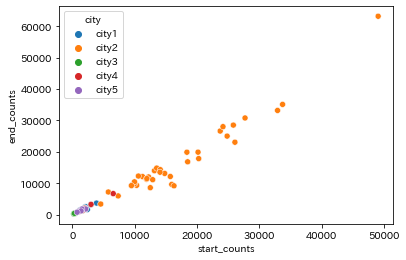

In [ ]:
sns.scatterplot(data=dock.sort_values(by='city'), x='start_counts', y='end_counts', hue='city')

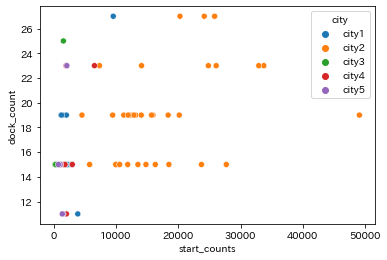

In [ ]:
sns.scatterplot(data=dock.sort_values(by='city'), x='start_counts', y='dock_count', hue='city')

#### Status + Trip

In [ ]:
busy1 = status[['hour', 'station_id',	'bikes_available', 'dock_count', 'available_rate']][(status['hour'] > 6) & (status['hour'] < 20)].groupby(by = ['station_id', 'hour']).mean()
busy1.loc[43]

,bikes_available,dock_count,available_rate
hour,,,
7,13.069388,23.0,0.568234
8,10.891837,23.0,0.473558
9,6.402041,23.0,0.278350
10,7.006122,23.0,0.304614
11,9.087755,23.0,0.395120
12,9.132653,23.0,0.397072
13,8.961224,23.0,0.389618
14,9.138776,23.0,0.397338
15,9.189796,23.0,0.399556


####Weather

In [ ]:
weather['events'].value_counts()

Rain        82
Fog         10
Fog-Rain     2
Name: events, dtype: int64

In [ ]:
print(f'There were {weather.events.isna().sum()/weather.shape[0]:.3%} of the days from Sep 2013 to Aug 2015 that were sunny.')

There were 87.123% of the days from Sep 2013 to Aug 2015 that were sunny.


Check the status of both sunny and not sunny days.

In [ ]:
station['installation_date'][0].to_pydatetime()

datetime.datetime(2013, 8, 6, 0, 0)

#### Status + Weather

In [ ]:
weather_buf = weather[['date', 'events']]
weather_buf.set_index('date')

,events
date,
2013-09-01,NaN
2013-09-02,NaN
2013-09-03,Rain
2013-09-04,NaN
2013-09-05,NaN
...,...
2015-08-27,NaN
2015-08-28,NaN
2015-08-29,NaN


In [ ]:
status_weather = status[['id', 'date_time', 'station_id', 'bikes_available']]
status_weather['date'] = status_weather['date_time'].dt.strftime('%Y-%m-%d')
status_weather

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,date_time,station_id,bikes_available,date
0,0,2013-09-01 00:00:00,0,11.0,2013-09-01
1,1,2013-09-01 01:00:00,0,11.0,2013-09-01
2,2,2013-09-01 02:00:00,0,11.0,2013-09-01
3,3,2013-09-01 03:00:00,0,11.0,2013-09-01
4,4,2013-09-01 04:00:00,0,11.0,2013-09-01
...,...,...,...,...,...
1226395,1226395,2015-08-31 19:00:00,69,8.0,2015-08-31
1226396,1226396,2015-08-31 20:00:00,69,8.0,2015-08-31
1226397,1226397,2015-08-31 21:00:00,69,8.0,2015-08-31
1226398,1226398,2015-08-31 22:00:00,69,8.0,2015-08-31


In [ ]:
status_weather = status_weather.merge(weather_buf, on = ['date'])
status_weather

,id,date_time,station_id,bikes_available,date,events
0,0,2013-09-01 00:00:00,0,11.0,2013-09-01,NaN
1,1,2013-09-01 01:00:00,0,11.0,2013-09-01,NaN
2,2,2013-09-01 02:00:00,0,11.0,2013-09-01,NaN
3,3,2013-09-01 03:00:00,0,11.0,2013-09-01,NaN
4,4,2013-09-01 04:00:00,0,11.0,2013-09-01,NaN
...,...,...,...,...,...,...
1226395,1226395,2015-08-31 19:00:00,69,8.0,2015-08-31,NaN
1226396,1226396,2015-08-31 20:00:00,69,8.0,2015-08-31,NaN
1226397,1226397,2015-08-31 21:00:00,69,8.0,2015-08-31,NaN
1226398,1226398,2015-08-31 22:00:00,69,8.0,2015-08-31,NaN


####Trip + Weather

In [ ]:
trip_weather = trip[['trip_id', 'start_date']]
trip_weather['date'] = trip_weather['start_date'].dt.strftime('%Y-%m-%d')
trip_weather

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,trip_id,start_date,date
0,0,2013-08-29 14:13:00,2013-08-29
1,1,2013-08-29 14:42:00,2013-08-29
2,2,2013-08-29 10:16:00,2013-08-29
3,3,2013-08-29 11:29:00,2013-08-29
4,4,2013-08-29 12:02:00,2013-08-29
...,...,...,...
669954,669954,2014-09-01 04:21:00,2014-09-01
669955,669955,2014-09-01 03:16:00,2014-09-01
669956,669956,2014-09-01 00:05:00,2014-09-01
669957,669957,2014-09-01 00:05:00,2014-09-01


In [ ]:
trip_weather = trip_weather.merge(weather_buf, on = ['date'])
trip_weather

,trip_id,start_date,date,events
0,2102,2013-09-01 00:11:00,2013-09-01,NaN
1,2103,2013-09-01 00:12:00,2013-09-01,NaN
2,2104,2013-09-01 00:19:00,2013-09-01,NaN
3,2105,2013-09-01 00:21:00,2013-09-01,NaN
4,2106,2013-09-01 00:23:00,2013-09-01,NaN
...,...,...,...,...
667852,669954,2014-09-01 04:21:00,2014-09-01,NaN
667853,669955,2014-09-01 03:16:00,2014-09-01,NaN
667854,669956,2014-09-01 00:05:00,2014-09-01,NaN
667855,669957,2014-09-01 00:05:00,2014-09-01,NaN


In [ ]:
trip_count = trip_weather.groupby(by = 'date').count()
trip_count

,trip_id,start_date,events
date,,,
2013-09-01,706,706,0
2013-09-02,661,661,0
2013-09-03,597,597,597
2013-09-04,606,606,0
2013-09-05,677,677,0
...,...,...,...
2015-08-27,1443,1443,0
2015-08-28,1220,1220,0
2015-08-29,342,342,0


In [ ]:
trip_count[trip_count['events'] > 0].head(20)

,trip_id,start_date,events
date,,,
2013-09-03,597,597,597
2013-09-21,388,388,388
2013-11-19,750,750,750
2013-11-20,625,625,625
2013-12-06,727,727,727
2013-12-07,277,277,277
2013-12-31,505,505,505
2014-01-30,946,946,946
2014-02-02,128,128,128


Found that the trips on weekend is apparently less than that on week days.</br>
However. it seems that the weather doesn't affect that much.</br>
Why 07-03 (Mon) was few?

In [ ]:
trip_count[trip_count.index > '2015-04-20'].head(40)

,trip_id,start_date,events
date,,,
2015-04-21,1371,1371,0
2015-04-22,1376,1376,0
2015-04-23,1368,1368,0
2015-04-24,1171,1171,0
2015-04-25,405,405,405
2015-04-26,291,291,0
2015-04-27,1233,1233,0
2015-04-28,1375,1375,0
2015-04-29,1314,1314,0


##Training/Evaluating data

####Dataset1

In [ ]:
status

,id,year,month,day,hour,station_id,bikes_available,predict,date_time,date,weekday,weekend,dock_count,available_rate
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00,2013-09-01,6,1,27,0.407407
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00,2013-09-01,6,1,27,0.407407
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00,2013-09-01,6,1,27,0.407407
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00,2013-09-01,6,1,27,0.407407
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00,2013-09-01,6,1,27,0.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31 19:00:00,2015-08-31,0,0,15,0.533333
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31 20:00:00,2015-08-31,0,0,15,0.533333
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31 21:00:00,2015-08-31,0,0,15,0.533333
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31 22:00:00,2015-08-31,0,0,15,0.533333


In [ ]:
dataset_1 = status[['date', 'hour', 'weekend', 'weekday', 'station_id', 'bikes_available', 'dock_count', 'available_rate', 'predict']]
dataset_1

,date,hour,weekend,weekday,station_id,bikes_available,dock_count,available_rate,predict
0,2013-09-01,0,1,6,0,11.0,27,0.407407,0
1,2013-09-01,1,1,6,0,11.0,27,0.407407,0
2,2013-09-01,2,1,6,0,11.0,27,0.407407,0
3,2013-09-01,3,1,6,0,11.0,27,0.407407,0
4,2013-09-01,4,1,6,0,11.0,27,0.407407,0
...,...,...,...,...,...,...,...,...,...
1226395,2015-08-31,19,0,0,69,8.0,15,0.533333,0
1226396,2015-08-31,20,0,0,69,8.0,15,0.533333,0
1226397,2015-08-31,21,0,0,69,8.0,15,0.533333,0
1226398,2015-08-31,22,0,0,69,8.0,15,0.533333,0


In [ ]:
dataset_1 = pd.get_dummies(dataset_1,columns=['weekday'])

In [ ]:
train_model_1 = dataset_1[dataset_1['date'] < '2014-09-01']
evaluate_model_1 = dataset_1[dataset_1['date'] >= '2014-08-31']
train_model_1

,date,hour,weekend,station_id,bikes_available,dock_count,available_rate,predict,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2013-09-01,0,1,0,11.0,27,0.407407,0,0,0,0,0,0,0,1
1,2013-09-01,1,1,0,11.0,27,0.407407,0,0,0,0,0,0,0,1
2,2013-09-01,2,1,0,11.0,27,0.407407,0,0,0,0,0,0,0,1
3,2013-09-01,3,1,0,11.0,27,0.407407,0,0,0,0,0,0,0,1
4,2013-09-01,4,1,0,11.0,27,0.407407,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217635,2014-08-31,19,1,69,10.0,15,0.666667,0,0,0,0,0,0,0,1
1217636,2014-08-31,20,1,69,10.0,15,0.666667,0,0,0,0,0,0,0,1
1217637,2014-08-31,21,1,69,10.0,15,0.666667,0,0,0,0,0,0,0,1
1217638,2014-08-31,22,1,69,10.0,15,0.666667,0,0,0,0,0,0,0,1


All the 70 stations are recorded from 2013-09-01, while some of them were built after 2013-09-01. Hence there are some NULL data in the 'bikes_available' column of the dataset.</br>
e.g. station_id = 69 was built on 2014-04-09, hence the data of the 69th station began from 2014-04-09 that day.

In [ ]:
train_model_1.isnull().sum()

date                   0
hour                   0
weekend                0
station_id             0
bikes_available    21605
dock_count             0
available_rate     21605
predict                0
weekday_0              0
weekday_1              0
weekday_2              0
weekday_3              0
weekday_4              0
weekday_5              0
weekday_6              0
dtype: int64

In [ ]:
train_model_1[train_model_1['bikes_available'].isna()]

,date,hour,weekend,station_id,bikes_available,dock_count,available_rate,predict,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
420480,2013-09-01,0,1,24,NaN,15,NaN,0,0,0,0,0,0,0,1
420481,2013-09-01,1,1,24,NaN,15,NaN,0,0,0,0,0,0,0,1
420482,2013-09-01,2,1,24,NaN,15,NaN,0,0,0,0,0,0,0,1
420483,2013-09-01,3,1,24,NaN,15,NaN,0,0,0,0,0,0,0,1
420484,2013-09-01,4,1,24,NaN,15,NaN,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214167,2014-04-09,7,0,69,NaN,15,NaN,0,0,0,1,0,0,0,0
1214168,2014-04-09,8,0,69,NaN,15,NaN,0,0,0,1,0,0,0,0
1214169,2014-04-09,9,0,69,NaN,15,NaN,0,0,0,1,0,0,0,0
1214170,2014-04-09,10,0,69,NaN,15,NaN,0,0,0,1,0,0,0,0


In [ ]:
station[station['station_id'] == 69]

,station_id,lat,long,dock_count,city,installation_date
69,69,37.34273,-121.89562,15,city1,2014-04-09


Assume all the available bikes of such statons are just equal to 'dock_count' after it was built.

In [ ]:
#train_model_1['bikes_available'] = train_model_1['bikes_available'].update(train_model_1['dock_count'])

Fill NA with full dock counts.

In [ ]:
#train_model_1['bikes_available'].fillna(train_model_1['dock_count'], inplace=True)
#train_model_1['available_rate'].fillna(train_model_1['bikes_available']/train_model_1['dock_count'], inplace=True) # = train_model_1['bikes_available']/train_model_1['dock_count']

Fill NA with the first data of this station.

In [ ]:
df_new = pd.DataFrame()
for station_id in train_model_1['station_id'].unique().tolist():
    temp_df = train_model_1[train_model_1['station_id'] == station_id]
    temp_df = temp_df.fillna(method = 'bfill')
    df_new = pd.concat([df_new, temp_df])

train_model_1 = df_new
print(train_model_1.isnull().sum())

date               0
hour               0
weekend            0
station_id         0
bikes_available    0
dock_count         0
available_rate     0
predict            0
weekday_0          0
weekday_1          0
weekday_2          0
weekday_3          0
weekday_4          0
weekday_5          0
weekday_6          0
dtype: int64


In [ ]:
train_model_1 = train_model_1.sort_values(['date', 'hour', 'station_id']).reset_index(drop=True).drop(columns=['predict'])
train_model_1

,date,hour,weekend,station_id,bikes_available,dock_count,available_rate,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2013-09-01,0,1,0,11.0,27,0.407407,0,0,0,0,0,0,1
1,2013-09-01,0,1,1,8.0,15,0.533333,0,0,0,0,0,0,1
2,2013-09-01,0,1,2,5.0,11,0.454545,0,0,0,0,0,0,1
3,2013-09-01,0,1,3,9.0,19,0.473684,0,0,0,0,0,0,1
4,2013-09-01,0,1,4,8.0,15,0.533333,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613195,2014-08-31,23,1,65,10.0,27,0.370370,0,0,0,0,0,0,1
613196,2014-08-31,23,1,66,9.0,15,0.600000,0,0,0,0,0,0,1
613197,2014-08-31,23,1,67,7.0,15,0.466667,0,0,0,0,0,0,1
613198,2014-08-31,23,1,68,8.0,15,0.533333,0,0,0,0,0,0,1


In [ ]:
train_model_1 = train_model_1.iloc[:,4:].drop(columns=['dock_count', 'available_rate'])
train_model_1

,bikes_available,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,11.0,0,0,0,0,0,0,1
1,8.0,0,0,0,0,0,0,1
2,5.0,0,0,0,0,0,0,1
3,9.0,0,0,0,0,0,0,1
4,8.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
613195,10.0,0,0,0,0,0,0,1
613196,9.0,0,0,0,0,0,0,1
613197,7.0,0,0,0,0,0,0,1
613198,8.0,0,0,0,0,0,0,1


In [ ]:
#train_model_1[(train_model_1['station_id'] == 69) & (train_model_1['date'] > '2014-04-07')].head(50)

In [ ]:
evaluate_model_1 = evaluate_model_1.sort_values(['date', 'hour', 'station_id']).reset_index(drop=True)
evaluate_model_1

,date,hour,weekend,station_id,bikes_available,dock_count,available_rate,predict,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2014-08-31,0,1,0,11.0,27,0.407407,0,0,0,0,0,0,0,1
1,2014-08-31,0,1,1,9.0,15,0.600000,0,0,0,0,0,0,0,1
2,2014-08-31,0,1,2,4.0,11,0.363636,0,0,0,0,0,0,0,1
3,2014-08-31,0,1,3,8.0,19,0.421053,0,0,0,0,0,0,0,1
4,2014-08-31,0,1,4,7.0,15,0.466667,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614875,2015-08-31,23,0,65,13.0,27,0.481481,0,1,0,0,0,0,0,0
614876,2015-08-31,23,0,66,7.0,15,0.466667,0,1,0,0,0,0,0,0
614877,2015-08-31,23,0,67,6.0,15,0.400000,0,1,0,0,0,0,0,0
614878,2015-08-31,23,0,68,5.0,15,0.333333,0,1,0,0,0,0,0,0


In [ ]:
#train_real_1 = train_model_1[['bikes_available']]
#evaluate_real_1 = evaluate_model_1[['bikes_available']]
#train_model_1.drop(columns=['date', 'hour', 'station_id', 'bikes_available', 'dock_count'], inplace=True)
#evaluate_model_1.drop(columns=['date', 'hour', 'station_id', 'bikes_available', 'dock_count'], inplace=True)

In [ ]:
#train_model_1 = train_model_1[['weekday', 'bikes_available']]
#evaluate_model_1 = evaluate_model_1[['weekday', 'bikes_available']]

In [ ]:
#train_model_1 = pd.get_dummies(train_model_1, columns=['weekday'])
#evaluate_model_1 = pd.get_dummies(evaluate_model_1, columns=['weekday'])

#### Dataset2

In [ ]:
dataset_2 = status[['date', 'hour', 'weekend', 'weekday', 'station_id', 'bikes_available', 'dock_count', 'available_rate', 'predict']]
dataset_2 = pd.get_dummies(dataset_2 ,columns=['weekday'])
train_model_2 = dataset_2[dataset_2['date'] < '2014-09-01']
evaluate_model_2 = dataset_2[dataset_2['date'] >= '2014-08-31']

df_new = pd.DataFrame()
for station_id in train_model_2['station_id'].unique().tolist():
    temp_df = train_model_2[train_model_2['station_id'] == station_id]
    temp_df = temp_df.fillna(method = 'bfill')
    df_new = pd.concat([df_new, temp_df])

train_model_2 = df_new
#print(train_model_2.isnull().sum())

train_model_2 = train_model_2.sort_values(['date', 'hour', 'station_id']).reset_index(drop=True).drop(columns=['predict'])
train_model_2 = train_model_2[['bikes_available', 'weekend']]
evaluate_model_2 = evaluate_model_2.sort_values(['date', 'hour', 'station_id']).reset_index(drop=True)
evaluate_model_2 = evaluate_model_2[['bikes_available', 'weekend']]
train_model_2

,bikes_available,weekend
0,11.0,1
1,8.0,1
2,5.0,1
3,9.0,1
4,8.0,1
...,...,...
613195,10.0,1
613196,9.0,1
613197,7.0,1
613198,8.0,1


####Dataset3

In [ ]:
dataset_3 = status[['date', 'hour', 'weekend', 'weekday', 'station_id', 'bikes_available', 'dock_count', 'available_rate', 'predict']]
dataset_3['origin_hour'] = dataset_3['hour']
dataset_3 = pd.get_dummies(dataset_3 ,columns=['hour'])
train_model_3 = dataset_3[dataset_3['date'] < '2014-09-01']
evaluate_model_3 = dataset_3[dataset_3['date'] >= '2014-08-31']

df_new = pd.DataFrame()
for station_id in train_model_3['station_id'].unique().tolist():
    temp_df = train_model_3[train_model_3['station_id'] == station_id]
    temp_df = temp_df.fillna(method = 'bfill')
    df_new = pd.concat([df_new, temp_df])

train_model_3 = df_new
#print(train_model_3.isnull().sum())

train_model_3 = train_model_3.sort_values(['date', 'origin_hour', 'station_id']).reset_index(drop = True).drop(columns = ['predict'])
train_model_3 = pd.concat([train_model_3[['bikes_available', 'weekend']], train_model_3.filter(regex = 'hour').drop(columns = ['origin_hour'])], axis=1)
evaluate_model_3 = evaluate_model_3.sort_values(['date', 'origin_hour', 'station_id']).reset_index(drop = True)
evaluate_model_3 = pd.concat([evaluate_model_3[['bikes_available', 'weekend', 'predict']], evaluate_model_3.filter(regex = 'hour').drop(columns = ['origin_hour'])], axis=1)
train_model_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bikes_available,weekend,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,11.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613195,10.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
613196,9.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
613197,7.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
613198,8.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


####Dataset4

In [ ]:
dataset_4 = status[['date', 'hour', 'weekend', 'weekday', 'station_id', 'bikes_available', 'dock_count', 'available_rate', 'predict']].copy(deep=True) 
dataset_4['day_night'] = dataset_4.hour.apply(lambda x: 0 if 0 <= x <= 5 else x)
#dataset_4['origin_hour'] = dataset_4['hour']
dataset_4 = pd.get_dummies(dataset_4 ,columns=['day_night'])
train_model_4 = dataset_4[dataset_4['date'] < '2014-09-01']
evaluate_model_4 = dataset_4[dataset_4['date'] >= '2014-08-31']

df_new = pd.DataFrame()
for station_id in train_model_4['station_id'].unique().tolist():
    temp_df = train_model_4[train_model_4['station_id'] == station_id]
    temp_df = temp_df.fillna(method = 'bfill')
    df_new = pd.concat([df_new, temp_df])

train_model_4 = df_new
#print(train_model_4.isnull().sum())

train_model_4 = train_model_4.sort_values(['date', 'hour', 'station_id']).reset_index(drop = True).drop(columns = ['predict'])
train_model_4 = pd.concat([train_model_4[['bikes_available', 'weekend']], train_model_4.filter(regex = 'day_night')], axis=1)
evaluate_model_4 = evaluate_model_4.sort_values(['date', 'hour', 'station_id']).reset_index(drop = True)
evaluate_model_4 = pd.concat([evaluate_model_4[['predict', 'date', 'hour', 'station_id', 'bikes_available', 'weekend']], evaluate_model_4.filter(regex = 'day_night')], axis=1)
train_model_4

,bikes_available,weekend,day_night_0,day_night_6,day_night_7,day_night_8,day_night_9,day_night_10,day_night_11,day_night_12,...,day_night_14,day_night_15,day_night_16,day_night_17,day_night_18,day_night_19,day_night_20,day_night_21,day_night_22,day_night_23
0,11.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613195,10.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
613196,9.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
613197,7.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
613198,8.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##Create Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

####basic commands

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit_transform(train_model_1.iloc[:,1:]) #.shape

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
list1 = [1,2,4,5]
list2 = [5,6,7,9]
listt = np.array([[list1, [.3,.5,.7,.9], ['a', 'b', 'c', 'd']], [[100,111,112,134], ['5', '4', '3', '77'], list2]])
listt #.shape

array([[['1', '2', '4', '5'],
        ['0.3', '0.5', '0.7', '0.9'],
        ['a', 'b', 'c', 'd']],

       [['100', '111', '112', '134'],
        ['5', '4', '3', '77'],
        ['5', '6', '7', '9']]], dtype='<U32')

####Train/Test

Split the train_model into train(90%) and test(10%) dataset.

In [ ]:
"""
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_for_inverse = MinMaxScaler(feature_range=(0, 1))
train_df_scale = scaler.fit_transform(train_model_1.iloc[:,:])
bikes_available_scale = scaler_for_inverse.fit_transform(train_model_1[['bikes_available']])
print(train_df_scale.shape)

length = len(train_df_scale)
train_size = int(length * 0.8)
test_size = length - train_size
train_1, test_1 = train_df_scale[0:train_size,:], train_df_scale[train_size:length,:]
print(train_1.shape)
print(test_1.shape)
"""

"\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaler_for_inverse = MinMaxScaler(feature_range=(0, 1))\ntrain_df_scale = scaler.fit_transform(train_model_1.iloc[:,:])\nbikes_available_scale = scaler_for_inverse.fit_transform(train_model_1[['bikes_available']])\nprint(train_df_scale.shape)\n\nlength = len(train_df_scale)\ntrain_size = int(length * 0.8)\ntest_size = length - train_size\ntrain_1, test_1 = train_df_scale[0:train_size,:], train_df_scale[train_size:length,:]\nprint(train_1.shape)\nprint(test_1.shape)\n"

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_for_inverse = MinMaxScaler(feature_range=(0, 1))
train_df_scale = scaler.fit_transform(train_model_4.iloc[:,:])
bikes_available_scale = scaler_for_inverse.fit_transform(train_model_4[['bikes_available']])
print(train_df_scale.shape)

last_test_days = 65
len_train = 24*(365-last_test_days)*70
train_4, test_4 = train_df_scale[:len_train], train_df_scale[len_train:]
print(len(train_4), len(test_4))

(613200, 21)
504000 109200


For predicting 70 stations' data of this hour, assuming the past 24 hrs data are necessary. Hence the past 70*24 = 1,680 data are grouped.</br>
Besides, the first 1,680 data are needed to predict the next hour's data, so start from 1680 and move 70 as an interval.

In [ ]:
def create_dataset(dataset):
    dataX = []
    dataY = np.array([])
    #extra_num = len(dataset) % 70
    #max_len = len(dataset)-extra_num
    for i in range(1680, len(dataset), 70): #len(dataset)
        xset = []
        for j in range(dataset.shape[1]):
            a = dataset[i-1680:i, j]
            xset.append(a)
        temp_array = np.array(dataset[i:i+70,0])
        dataY = np.concatenate([dataY,temp_array])
        dataX.append(xset)
    dataY = dataY.reshape(-1,70)
    return np.array(dataX), dataY 

In [ ]:
trainX_4, trainY_4 = create_dataset(train_4)
testX_4, testY_4 = create_dataset(test_4)
trainX_4 = np.reshape(trainX_4, (trainX_4.shape[0], trainX_4.shape[1], trainX_4.shape[2]))
testX_4 = np.reshape(testX_4, (testX_4.shape[0], testX_4.shape[1], testX_4.shape[2]))
#_, real_trainY_1 = create_dataset(real_train_1)
#_, real_testY_1 = create_dataset(real_test_1)

In [ ]:
print(f'The shape of trainX_1 is {trainX_4.shape}.')
print(f'The shape of trainY_1 is {trainY_4.shape}.')
print(f'The shape of testX_1 is {testX_4.shape}.')
print(f'The shape of testY_1 is {testY_4.shape}.')
#print(f'The shape of real_trainY_1 is {real_trainY_1.shape}.')
#print(f'The shape of real_testY_1 is {real_testY_1.shape}.')

The shape of trainX_1 is (7176, 21, 1680).
The shape of trainY_1 is (7176, 70).
The shape of testX_1 is (1536, 21, 1680).
The shape of testY_1 is (1536, 70).


In [ ]:
model = Sequential([
                    LSTM(50, input_shape = (trainX_4.shape[1], 1680)),
                    Dense(70)
])

In [ ]:
#model = Sequential()
#model.add(LSTM(50, input_shape=(trainX_1.shape[1],1680)))
#model.add(Dense(70))

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')

trainX_1,2: batch_size =1</br>
trainX_3: batch_size =10

In [ ]:
model.fit(x = trainX_4, y = trainY_4, batch_size = 10, epochs = 20, verbose = 2)

Epoch 1/20
718/718 - 25s - loss: 0.0144 - 25s/epoch - 34ms/step
Epoch 2/20
718/718 - 21s - loss: 0.0129 - 21s/epoch - 30ms/step
Epoch 3/20
718/718 - 21s - loss: 0.0126 - 21s/epoch - 30ms/step
Epoch 4/20
718/718 - 21s - loss: 0.0123 - 21s/epoch - 29ms/step
Epoch 5/20
718/718 - 21s - loss: 0.0121 - 21s/epoch - 30ms/step
Epoch 6/20
718/718 - 21s - loss: 0.0116 - 21s/epoch - 30ms/step
Epoch 7/20
718/718 - 21s - loss: 0.0112 - 21s/epoch - 30ms/step
Epoch 8/20
718/718 - 21s - loss: 0.0111 - 21s/epoch - 30ms/step
Epoch 9/20
718/718 - 21s - loss: 0.0110 - 21s/epoch - 30ms/step
Epoch 10/20
718/718 - 21s - loss: 0.0109 - 21s/epoch - 30ms/step
Epoch 11/20
718/718 - 21s - loss: 0.0108 - 21s/epoch - 30ms/step
Epoch 12/20
718/718 - 21s - loss: 0.0108 - 21s/epoch - 30ms/step
Epoch 13/20
718/718 - 22s - loss: 0.0107 - 22s/epoch - 30ms/step
Epoch 14/20
718/718 - 22s - loss: 0.0107 - 22s/epoch - 30ms/step
Epoch 15/20
718/718 - 22s - loss: 0.0107 - 22s/epoch - 30ms/step
Epoch 16/20
718/718 - 22s - loss: 

In [ ]:
train_predict_4 = model.predict(x = trainX_4) #, batch_size = 10, verbose = 0
test_predict_4 = model.predict(x = testX_4) #, batch_size = 10, verbose = 0

In [ ]:
train_predict_4 = scaler_for_inverse.inverse_transform(train_predict_4)
trainY_4 = scaler_for_inverse.inverse_transform(trainY_4)
test_predict_4 = scaler_for_inverse.inverse_transform(test_predict_4)
testY_4 = scaler_for_inverse.inverse_transform(testY_4)
train_score_list = []
test_score_list = []

for i in range(70):
    trainscore = mean_squared_error(trainY_4[:,i], train_predict_4[:,i], squared = False)
    train_score_list.append(trainscore)
    testscore = mean_squared_error(testY_4[:,i], test_predict_4[:,i], squared = False)
    test_score_list.append(testscore)

In [ ]:
print(f'Average of RMSE of train dataset = {sum(train_score_list)/70}')
print(f'Average of RMSE of test dataset = {sum(test_score_list)/70}')

Average of RMSE of train dataset = 2.6060307003319294
Average of RMSE of test dataset = 3.0373275033640366
